In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, callback, Output, State, Input, dcc, html
import os


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print(os.getcwd())
# os.chdir('../input/predict-energy-behavior-of-prosumers')
os.listdir()

D:\predict-energy-behavior-of-prosumers


['.ipynb_checkpoints',
 'client.csv',
 'county_id_to_name_map.json',
 'electricity_prices.csv',
 'enefit',
 'Enefit_Prosumer Energy Data_EDA_Visualization.ipynb',
 'example_test_files',
 'forecast_weather.csv',
 'gas_prices.csv',
 'historical_weather.csv',
 'public_timeseries_testing_util.py',
 'train.csv',
 'weather_station_to_county_mapping.csv']

## Load the data files

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [4]:
client_data = pd.read_csv('client.csv')
client_data.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [5]:
gas_prices_data = pd.read_csv('gas_prices.csv')
gas_prices_data.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [6]:
electricity_prices_data = pd.read_csv('electricity_prices.csv')
electricity_prices_data.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [7]:
historical_weather_data = pd.read_csv('historical_weather.csv')
historical_weather_data.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [8]:
forecast_weather_data = pd.read_csv('forecast_weather.csv')
forecast_weather_data.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


In [9]:
import json
with open('county_id_to_name_map.json', 'r') as f:
    data = json.load(f)
print(data)

county_id_to_name_map = pd.read_json('county_id_to_name_map.json', typ='series')

{'0': 'HARJUMAA', '1': 'HIIUMAA', '2': 'IDA-VIRUMAA', '3': 'JÄRVAMAA', '4': 'JÕGEVAMAA', '5': 'LÄÄNE-VIRUMAA', '6': 'LÄÄNEMAA', '7': 'PÄRNUMAA', '8': 'PÕLVAMAA', '9': 'RAPLAMAA', '10': 'SAAREMAA', '11': 'TARTUMAA', '12': 'UNKNOWN', '13': 'VALGAMAA', '14': 'VILJANDIMAA', '15': 'VÕRUMAA'}


In [10]:
weather_station_to_country_map = pd.read_csv('weather_station_to_county_mapping.csv').dropna()
weather_station_to_country_map['county'] = weather_station_to_country_map['county'].astype('int')
weather_station_to_country_map.head()

,county_name,longitude,latitude,county
10,Saaremaa,22.2,58.2,10
11,Saaremaa,22.2,58.5,10
19,Saaremaa,22.7,58.5,10
20,Hiiumaa,22.7,58.8,1
27,Saaremaa,23.2,58.5,10


## Determining the data quality and hierarchy

In [11]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [12]:
train_data.groupby('product_type').agg({'prediction_unit_id':['unique','nunique']}).sort_index()

prediction_unit_id  \
                                                                                                                           unique   
product_type                                                                                                                        
0                                                                                                         [3, 17, 21, 28, 64, 67]   
1                           [0, 4, 6, 11, 13, 15, 19, 22, 25, 29, 31, 34, 36, 38, 40, 43, 46, 50, 53, 55, 57, 59, 62, 63, 65, 66]   
2                                                                                                     [1, 26, 41, 44, 47, 61, 68]   
3             [2, 5, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 24, 27, 30, 32, 33, 35, 37, 39, 42, 45, 48, 49, 51, 52, 54, 56, 58, 60]   

                      
             nunique  
product_type          
0                  6  
1                 26  
2                  7  
3                 30

In [13]:
train_data.groupby('product_type').agg({'county':['unique','nunique']}).sort_index()

county        
                                                              unique nunique
product_type                                                                
0                                               [0, 4, 5, 7, 15, 11]       6
1                    [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 2]      14
2                                                 [0, 7, 10, 11, 14]       5
3             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]      16

In [14]:
train_data_range = train_data.groupby(['product_type','county','is_business']).agg({'prediction_unit_id':['unique','nunique'],
                                                                                    'datetime':['min','max','nunique'],
                                                                                    'data_block_id':['min','max','nunique']}).sort_index()

train_data_range['percent_missing'] = (1- train_data_range[('datetime','nunique')]/ \
                                      (train_data_range[('datetime','max')] - train_data_range[('datetime','min')]) \
                                      .apply(lambda x: round(x/pd.Timedelta('1 hour')+1))) * 100

with pd.option_context('display.max_rows', None):
    display(train_data_range.sort_values(by='percent_missing', ascending=False))

prediction_unit_id           datetime  \
                                            unique nunique        min   
product_type county is_business                                         
2            14     1                         [68]       1 2022-11-01   
             10     1                         [41]       1 2021-09-01   
             7      0                         [26]       1 2021-09-01   
             11     1                         [47]       1 2021-09-01   
                    0                         [44]       1 2021-09-01   
0            5      1                         [21]       1 2021-09-01   
3            14     0                         [54]       1 2021-09-01   
             13     1                         [52]       1 2021-09-01   
             15     0                         [58]       1 2021-09-01   
             0      0                          [2]       1 2021-09-01   
                    1                          [5]       1 2021-09-01   
             1      0                          [7]       1 2021-09-01   
                    1                          [8]       1 2021-09-01   
             2      0                          [9]       1 2021-09-01   
                    1                         [10]       1 2021-09-01   
             3      0                         [12]       1 2021-09-01   
                    1                         [14]       1 2021-09-01   
             4      0                         [16]       1 2021-09-01   
                    1                         [18]       1 2021-09-01   
             5      0                         [20]       1 2021-09-01   
                    1                         [23]       1 2021-09-01   
             6      1                         [24]       1 2021-09-01   
             7      0                         [27]       1 2021-09-01   
             14     1                         [56]       1 2021-09-01   
             8      0                         [32]       1 2021-09-01   
                    1                         [33]       1 2021-09-01   
             9      0                         [35]       1 2021-09-01   
                    1                         [37]       1 2021-09-01   
             10     0                         [39]       1 2021-09-01   
                    1                         [42]       1 2021-09-01   
             11     0                         [45]       1 2021-09-01   
                    1                         [48]       1 2021-09-01   
             12     1                         [49]       1 2021-09-01   
             13     0                         [51]       1 2021-09-01   
             7      1                         [30]       1 2021-09-01   
0            0      1                          [3]       1 2021-09-01   
             4      1                         [17]       1 2021-09-01   
1            7      0                         [25]       1 2021-09-01   
0            7      1                         [28]       1 2021-09-01   
             11     1                         [67]       1 2022-02-01   
             15     1                         [64]       1 2021-12-01   
1            0      0                          [0]       1 2021-09-01   
                    1                          [4]       1 2021-09-01   
             1      0                          [6]       1 2021-09-01   
             2      0                         [62]       1 2021-10-01   
                    1                         [65]       1 2022-01-01   
             3      0                         [11]       1 2021-09-01   
                    1                         [13]       1 2021-09-01   
             4      0                         [15]       1 2021-09-01   
                    1                         [66]       1 2022-01-01   
             5      0                         [19]       1 2021-09-01   
                    1                         [22]       1 2021-09-01   
             7   

In [15]:
train_data.groupby('data_block_id').agg({'datetime':['min','max','nunique']}).sort_index()

datetime                            
                     min                 max nunique
data_block_id                                       
0             2021-09-01 2021-09-01 23:00:00      24
1             2021-09-02 2021-09-02 23:00:00      24
2             2021-09-03 2021-09-03 23:00:00      24
3             2021-09-04 2021-09-04 23:00:00      24
4             2021-09-05 2021-09-05 23:00:00      24
...                  ...                 ...     ...
633           2023-05-27 2023-05-27 23:00:00      24
634           2023-05-28 2023-05-28 23:00:00      24
635           2023-05-29 2023-05-29 23:00:00      24
636           2023-05-30 2023-05-30 23:00:00      24
637           2023-05-31 2023-05-31 23:00:00      24

[638 rows x 3 columns]

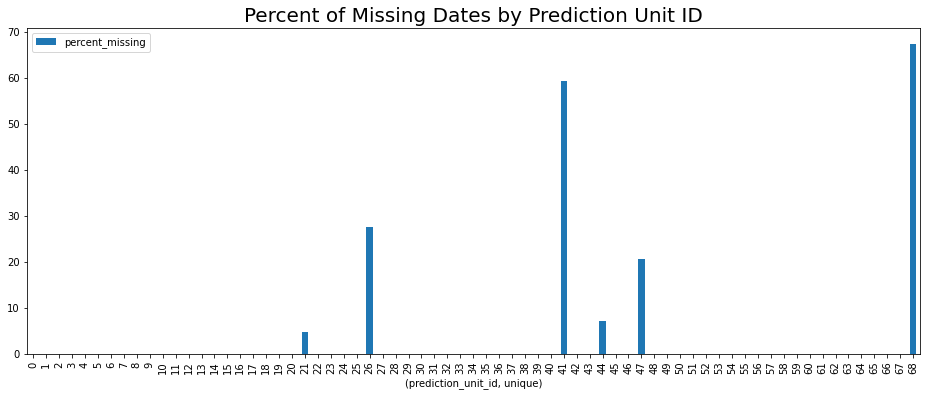

In [16]:
train_data_range = train_data_range.reset_index().sort_values(by = ('prediction_unit_id','unique'))
train_data_range[('prediction_unit_id','unique')] = train_data_range[('prediction_unit_id','unique')].apply(lambda x: x[0])
train_data_range.plot(kind='bar', x=('prediction_unit_id','unique'), y='percent_missing', figsize=(16,6))
plt.title('Percent of Missing Dates by Prediction Unit ID', fontsize=20)
plt.show()

## Separate consumption & production data 

In [17]:
production_train_data = train_data[train_data.is_consumption == 0]
consumption_train_data = train_data[train_data.is_consumption == 1]

In [18]:
print(train_data.shape)

(2018352, 9)


In [19]:
print(production_train_data.shape)
print(consumption_train_data.shape)

(1009176, 9)
(1009176, 9)


In [20]:
train_data_new = pd.merge(consumption_train_data, production_train_data,
         on = ['county','is_business','product_type',
               'datetime','data_block_id','prediction_unit_id'],
         how = 'inner')
train_data_new = train_data_new.drop(['is_consumption_x','is_consumption_y',
                                        'row_id_x','row_id_y'],axis=1).rename({'target_x':'consumption_amount','target_y':'production_amount'},axis=1)                                

In [21]:
train_data_new.head()

,county,is_business,product_type,consumption_amount,datetime,data_block_id,prediction_unit_id,production_amount
0,0,0,1,96.590,2021-09-01,0,0,0.713
1,0,0,2,17.314,2021-09-01,0,1,0.000
2,0,0,3,656.859,2021-09-01,0,2,2.904
3,0,1,0,59.000,2021-09-01,0,3,0.000
4,0,1,1,501.760,2021-09-01,0,4,0.000


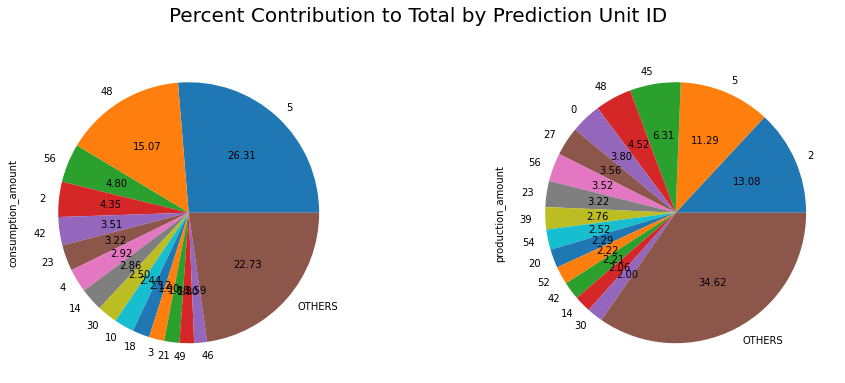

In [23]:
energy_by_prediction_unit = train_data_new.groupby('prediction_unit_id')[['consumption_amount','production_amount']].sum()
energy_by_prediction_unit_perc = (energy_by_prediction_unit/energy_by_prediction_unit.sum(axis=0) * 100)
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for col in energy_by_prediction_unit_perc.columns:
    values = pd.concat([energy_by_prediction_unit_perc[col].sort_values(ascending=False)[:15], 
                        pd.Series(energy_by_prediction_unit_perc[col].sort_values(ascending=False)[15:].sum(), index=['OTHERS'])], axis=0)
    values.name = col
    values.plot(kind='pie', autopct='%.2f', ax=ax[i])
    i+=1
fig.suptitle('Percent Contribution to Total by Prediction Unit ID', fontsize=20)
plt.show()

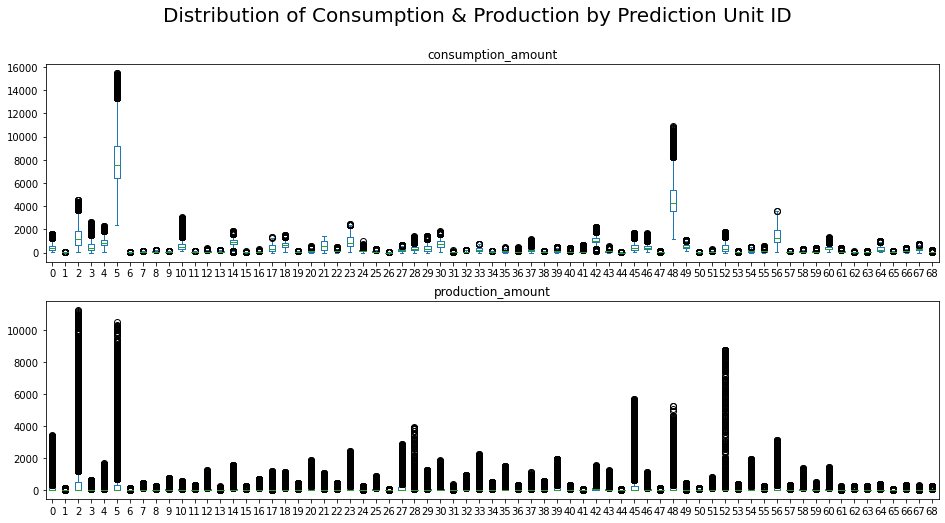

In [24]:
train_data_new['prediction_unit_id'] = train_data_new['prediction_unit_id'].astype('O')

fig, ax  = plt.subplots(2,1, figsize=(16,8))
train_data_new.plot(kind='box', by = 'prediction_unit_id', column = 'consumption_amount', ax=ax[0])
train_data_new.plot(kind='box', by = 'prediction_unit_id', column = 'production_amount', ax=ax[1])

fig.suptitle('Distribution of Consumption & Production by Prediction Unit ID', fontsize=20)
plt.show()

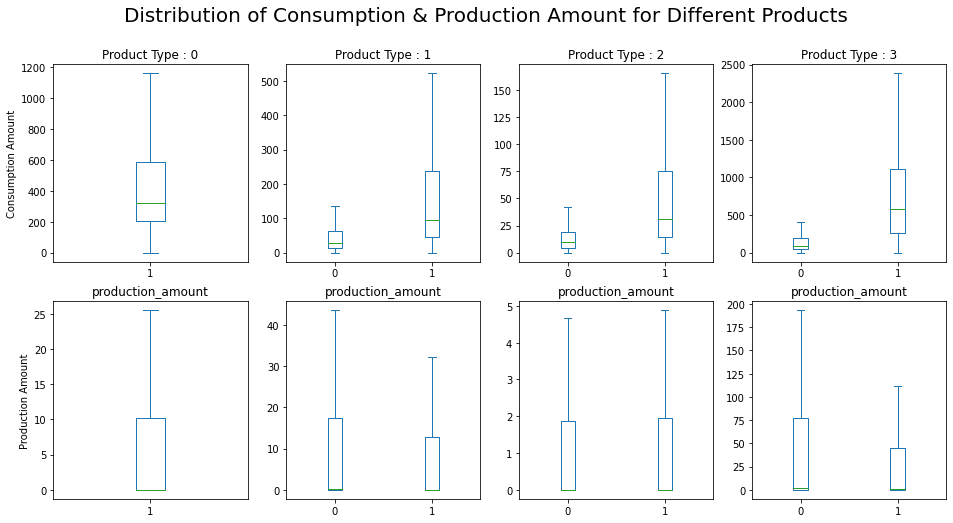

In [25]:
fig, ax  = plt.subplots(2,4, figsize=(16,8))
i=0
for prod in sorted(train_data_new['product_type'].unique()):
    train_data_new[train_data_new['product_type']==prod].plot(kind='box', by='is_business',
                                                              column = 'consumption_amount', ax=ax.flat[i], showfliers=False)
    train_data_new[train_data_new['product_type']==prod].plot(kind='box', by='is_business',
                                                              column = 'production_amount', ax=ax.flat[i+4], showfliers=False)
    ax.flat[i].set_title(f'Product Type : {prod}')
    i+=1

ax.flat[0].set_ylabel('Consumption Amount') 
ax.flat[4].set_ylabel('Production Amount') 

fig.suptitle('Distribution of Consumption & Production Amount for Different Products', fontsize=20)
plt.show()

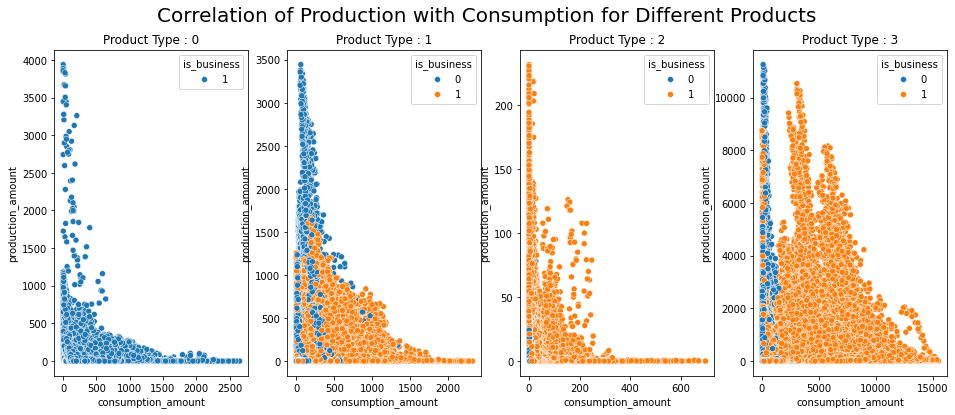

In [26]:
fig, ax  = plt.subplots(1,4, figsize=(16,6))
i=0

for prod in sorted(train_data_new['product_type'].unique()):
    sns.scatterplot(data=train_data_new[train_data_new['product_type']==prod], 
                    x='consumption_amount', y='production_amount', hue='is_business', ax=ax[i])
    ax[i].set_title(f'Product Type : {prod}')
    i+=1
fig.suptitle('Correlation of Production with Consumption for Different Products', fontsize=20)
plt.show()

In [27]:
# Callback function to update data source based on aggregation level

def update_data_source(aggregation_level, df):
    start = datetime.fromisoformat('2021-09-01T00:00:00')
    end = datetime.fromisoformat('2023-05-31T23:00:00')
    df = df[(df['datetime'] >= start) & (df['datetime'] <= end)]
    if aggregation_level == 'Hourly':
        time_level = df.datetime.dt.hour
        agg = 'mean'
    elif aggregation_level == 'Daily':
        time_level = df.datetime.dt.date
        agg = 'sum'
    else:
        time_level = df.datetime
        agg = 'mean'
        df = df[(df['datetime'] >= '2022-12-01T00:00:00') & (df['datetime'] <= '2022-12-31T23:00:00')]

    aggregation_level = {'prediction_unit_id': "prediction_unit_id", 
                         'datetime': time_level }
    
    energy_by_time_prediction_unit = df.groupby(list(aggregation_level.values())).agg({'production_amount':agg,'consumption_amount' : agg})
    energy_by_time_prediction_unit.index.names = list(aggregation_level.keys())
    energy_by_time_prediction_unit = energy_by_time_prediction_unit.reset_index()

    return energy_by_time_prediction_unit

In [28]:
# Plotly code
app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='aggregation-level',
        options=[
            {'label': 'None', 'value': 'None'},
            {'label': 'Daily', 'value': 'Daily'},
            {'label': 'Hourly', 'value': 'Hourly'},
        ],
        value='Hourly',
        clearable=False
    ),
    dcc.Graph(id='bar-chart')])

In [29]:
@app.callback(Output('bar-chart', 'figure'),
              [Input('aggregation-level', 'value')])

def update_chart(aggregation_level):
    updated_data = update_data_source(aggregation_level, train_data_new)
    fig = px.bar(updated_data, x='datetime', y=['consumption_amount','production_amount'],
                 color_discrete_map={'consumption_amount': 'red', 'production_amount':'blue'},
                 labels={'value': 'Amount', 'datetime': 'Time Period'},
                 title='Production vs Consumption',
                 category_orders={'datetime': updated_data['datetime'].sort_values().unique()},
                 animation_frame='prediction_unit_id',
                 barmode='group')
    fig.update_layout(sliders=[{'active': 0,
                                 'yanchor': 'top',
                                 'xanchor': 'left',
                                 'currentvalue': {'prefix': 'Prediction Unit ID: ', 'visible': True, 'font': {'size': 15}},
                                 'transition': {'duration': 300, 'easing': 'cubic-in-out'},
                                 'pad': {'b': 10, 't': 50},
                                 'len': 0.9,
                                 'x': 0.1,
                                 'y': 0,
                                 'steps': [{'args': [[i], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate',
                                                          'transition': {'duration': 300}}],
                                            'label': str(i),
                                            'method': 'animate'} for i in updated_data['prediction_unit_id'].unique()]}])

    fig.update_layout(showlegend=True, sliders=None, autosize=True, width=1000, height=600)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

## Examining external data 

In [30]:
# Aggregate train data to daily level

train_data_daily_agg = train_data_new.groupby(['county','is_business','product_type', 
                                               'data_block_id','prediction_unit_id'])\
                                              .agg({'consumption_amount':'sum','production_amount':'sum', 
                                                    'datetime':'first'}).reset_index()
df_train_client_data = pd.merge(train_data_daily_agg, client_data,
                              on = ['county','is_business','product_type', 'data_block_id'],
                              how = 'inner')
df_train_client_data.head()

,county,is_business,product_type,data_block_id,prediction_unit_id,consumption_amount,production_amount,datetime,eic_count,installed_capacity,date
0,0,0,1,2,0,2182.350,2299.575,2021-09-03,108,952.89,2021-09-01
1,0,0,1,3,0,2233.543,3120.306,2021-09-04,108,952.89,2021-09-02
2,0,0,1,4,0,2324.871,2584.260,2021-09-05,108,952.89,2021-09-03
3,0,0,1,5,0,2167.410,1547.215,2021-09-06,108,952.89,2021-09-04
4,0,0,1,6,0,2111.520,1390.771,2021-09-07,108,952.89,2021-09-05


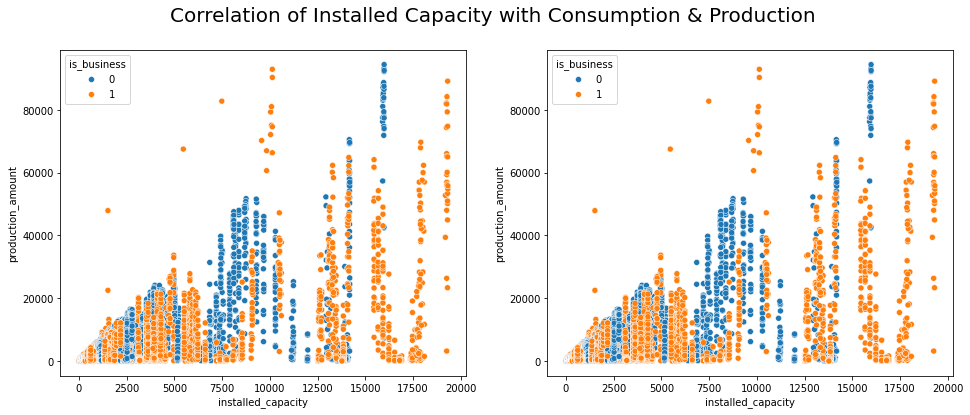

In [31]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0

for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_client_data, x='installed_capacity', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Installed Capacity with Consumption & Production', fontsize=20)
plt.show()

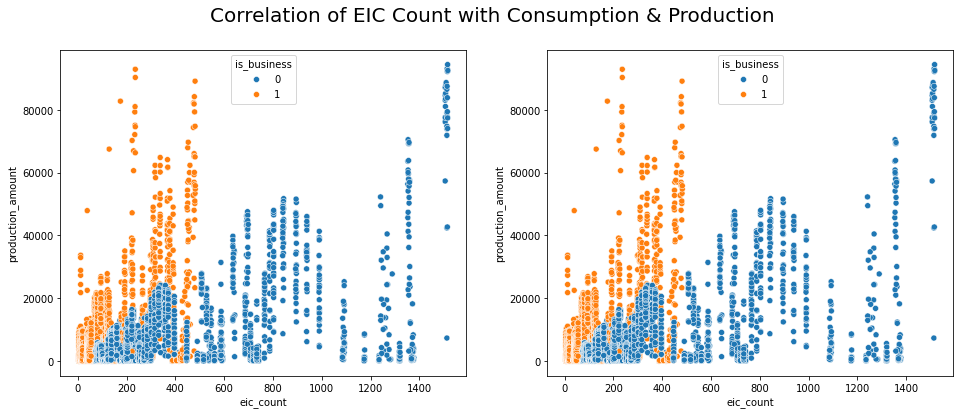

In [32]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_client_data, x='eic_count', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of EIC Count with Consumption & Production', fontsize=20)
plt.show()

In [33]:
df_train_electricity_prices = pd.merge(train_data_new, electricity_prices_data,
                                           on = ['data_block_id'], how = 'inner')
df_train_electricity_prices.head()                                       

,county,is_business,product_type,consumption_amount,datetime,data_block_id,prediction_unit_id,production_amount,forecast_date,euros_per_mwh,origin_date
0,0,0,1,109.366,2021-09-02,1,0,1.687,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00
1,0,0,1,109.366,2021-09-02,1,0,1.687,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00
2,0,0,1,109.366,2021-09-02,1,0,1.687,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00
3,0,0,1,109.366,2021-09-02,1,0,1.687,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00
4,0,0,1,109.366,2021-09-02,1,0,1.687,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00


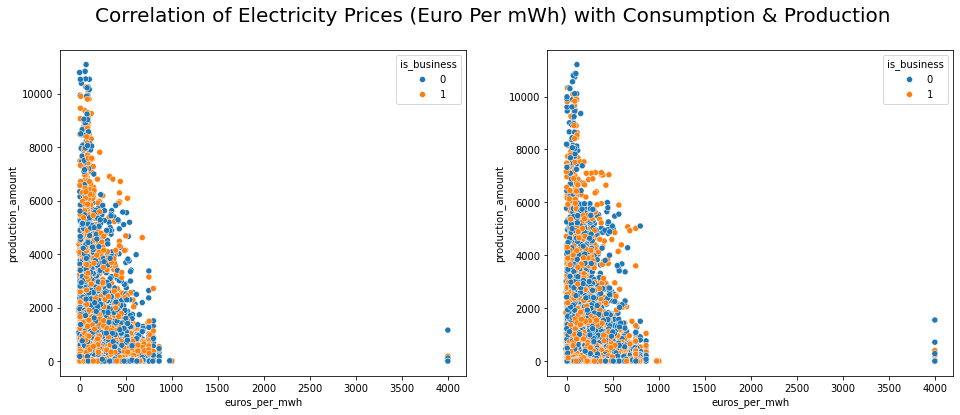

In [34]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_electricity_prices.sample(frac=0.01), x='euros_per_mwh', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Electricity Prices (Euro Per mWh) with Consumption & Production', fontsize=20)
plt.show()

In [35]:
df_train_gas_prices = pd.merge(train_data_new, gas_prices_data,
                                           on = ['data_block_id'], how = 'inner')
df_train_gas_prices.head()

,county,is_business,product_type,consumption_amount,datetime,data_block_id,prediction_unit_id,production_amount,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date
0,0,0,1,109.366,2021-09-02,1,0,1.687,2021-09-01,45.23,46.32,2021-08-31
1,0,0,2,21.008,2021-09-02,1,1,0.000,2021-09-01,45.23,46.32,2021-08-31
2,0,0,3,735.696,2021-09-02,1,2,1.003,2021-09-01,45.23,46.32,2021-08-31
3,0,1,0,75.800,2021-09-02,1,3,0.000,2021-09-01,45.23,46.32,2021-08-31
4,0,1,1,502.241,2021-09-02,1,4,0.000,2021-09-01,45.23,46.32,2021-08-31


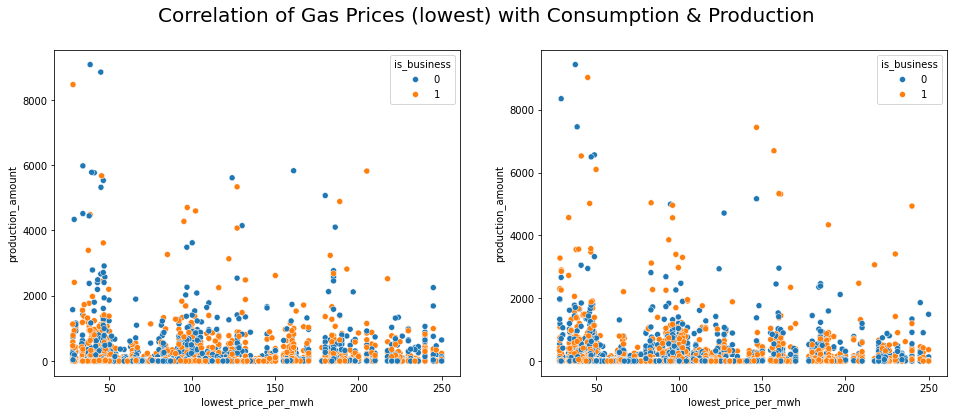

In [36]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_gas_prices.sample(frac=0.01), x='lowest_price_per_mwh', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Gas Prices (lowest) with Consumption & Production', fontsize=20)
plt.show()

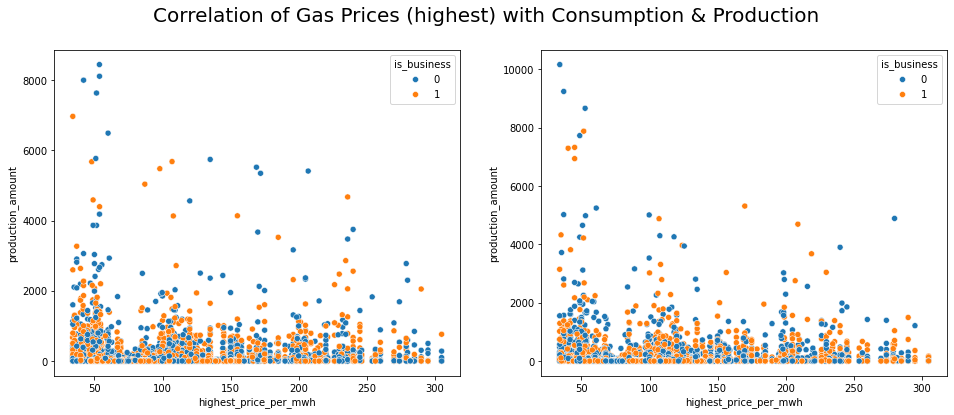

In [37]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_gas_prices.sample(frac=0.01), x='highest_price_per_mwh', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Gas Prices (highest) with Consumption & Production', fontsize=20)
plt.show()

In [38]:
historical_weather_data = pd.merge(historical_weather_data, weather_station_to_country_map, on=['latitude','longitude'])
df_train_hist_weather = pd.merge(train_data_new, historical_weather_data,
                                           on = ['data_block_id', 'county'], how = 'inner')
df_train_hist_weather.head()

,county,is_business,product_type,consumption_amount,datetime_x,data_block_id,prediction_unit_id,production_amount,datetime_y,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,county_name
0,7,0,1,20.186,2021-09-02,1,25,0.0,2021-09-01 00:00:00,11.1,10.0,0.0,0.0,1009.7,71,79,0,0,2.333333,340,0.0,0.0,0.0,58.2,24.7,Pärnumaa
1,7,0,1,20.186,2021-09-02,1,25,0.0,2021-09-01 01:00:00,11.1,10.2,0.0,0.0,1009.5,78,85,0,5,2.583333,332,0.0,0.0,0.0,58.2,24.7,Pärnumaa
2,7,0,1,20.186,2021-09-02,1,25,0.0,2021-09-01 02:00:00,11.3,10.3,0.0,0.0,1009.1,76,77,0,22,2.972222,327,0.0,0.0,0.0,58.2,24.7,Pärnumaa
3,7,0,1,20.186,2021-09-02,1,25,0.0,2021-09-01 03:00:00,11.5,10.3,0.0,0.0,1009.0,56,56,0,20,3.500000,329,0.0,0.0,0.0,58.2,24.7,Pärnumaa
4,7,0,1,20.186,2021-09-02,1,25,0.0,2021-09-01 04:00:00,11.4,10.0,0.0,0.0,1009.0,46,46,0,14,3.972222,335,0.0,0.0,0.0,58.2,24.7,Pärnumaa


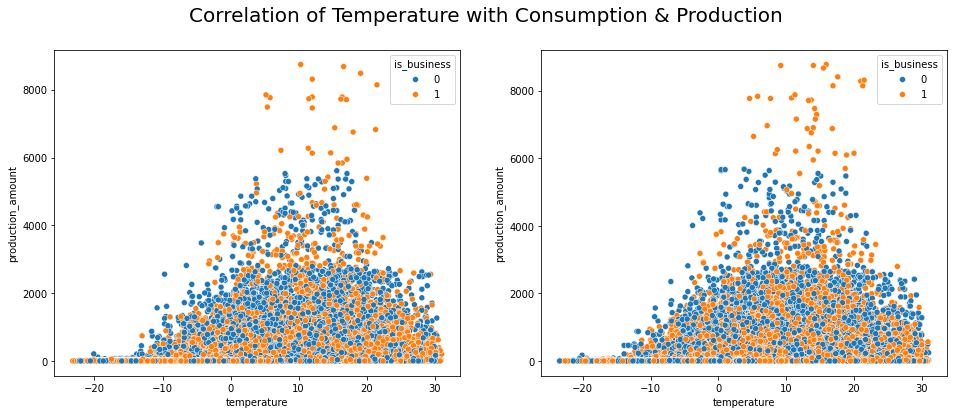

In [39]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_hist_weather.sample(frac=0.01), x='temperature', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Temperature with Consumption & Production', fontsize=20)
plt.show()

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



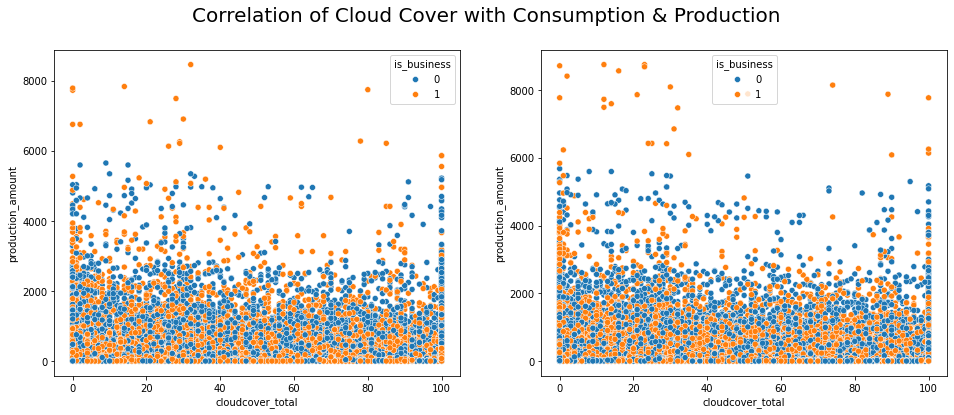

In [40]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_hist_weather.sample(frac=0.01), x='cloudcover_total', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Cloud Cover with Consumption & Production', fontsize=20)
plt.show()

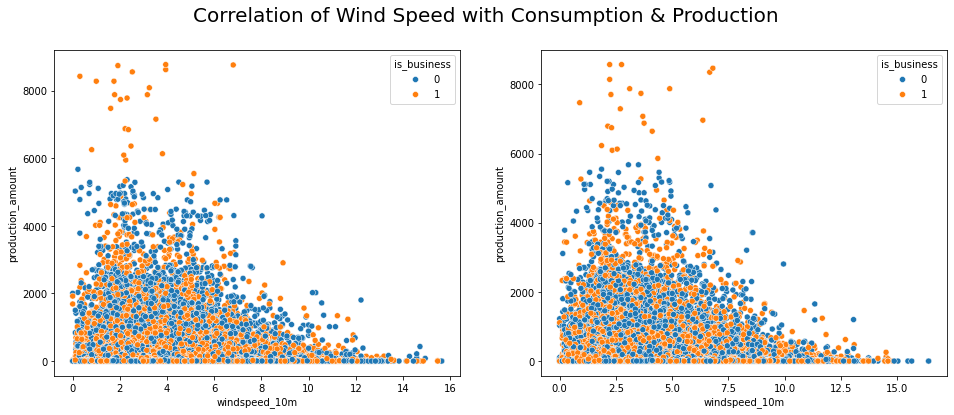

In [41]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_hist_weather.sample(frac=0.01), x='windspeed_10m', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Wind Speed with Consumption & Production', fontsize=20)
plt.show()

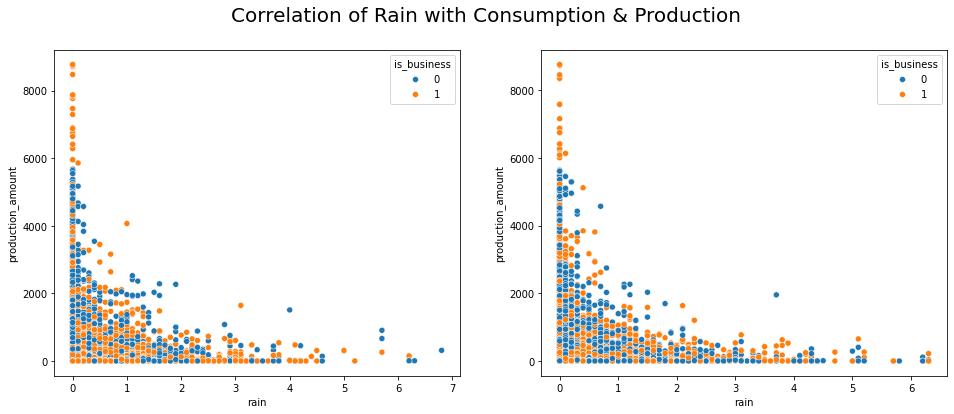

In [42]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_hist_weather.sample(frac=0.01), x='rain', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Rain with Consumption & Production', fontsize=20)
plt.show()

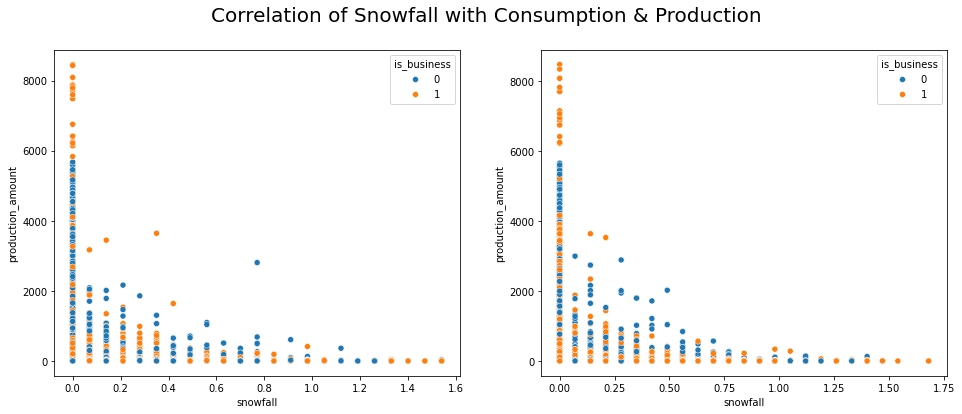

In [43]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_hist_weather.sample(frac=0.01), x='snowfall', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Snowfall with Consumption & Production', fontsize=20)
plt.show()

D:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



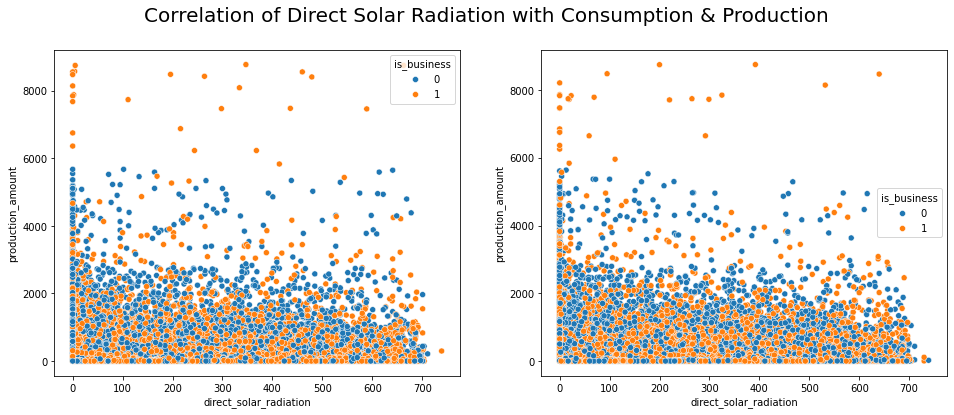

In [44]:
fig, ax  = plt.subplots(1,2, figsize=(16,6))
i=0
for prod in ['consumption_amount','production_amount']:
    sns.scatterplot(data=df_train_hist_weather.sample(frac=0.01), x='direct_solar_radiation', y=col, hue='is_business', ax=ax[i])
    i+=1
fig.suptitle('Correlation of Direct Solar Radiation with Consumption & Production', fontsize=20)
plt.show()